In [1723]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#  주제
#  소득에 따른 자동차 수 변화
#       자동차 수  ==> 자동차등록대수   (RMV)
#  소득에 따른 물가지수 변화
#       물가지수   ==> 소비자 물가지수  (CPI)
#  소득 관련 데이터       
#       소득       ==> 1인당 국민총소득 (GNI)

In [1724]:
FILE_NAME = ('../pandas_project_source/자동차등록대수현황_연도별_20230105195435.csv')  # 자동차등록대수 파일네임 지정

rmvO = pd.read_csv(FILE_NAME, encoding='euc-kr') # 자동차등록대수 파일 불러오기

rmvO

,구분(1),레벨01(1),2015,2015.1,2015.2,2015.3,2016,2016.1,2016.2,2016.3,...,2019.2,2019.3,2020,2020.1,2020.2,2020.3,2021,2021.1,2021.2,2021.3
0,구분(1),레벨01(1),계,관용,자가용,영업용,계,관용,자가용,영업용,...,자가용,영업용,계,관용,자가용,영업용,계,관용,자가용,영업용
1,총합계,승용,16561665,27004,15807517,727144,17338160,27750,16505364,805046,...,18071723,1072450,19860955,33619,18686570,1140766,20410648,34548,19168262,1207838
2,총합계,승합,920320,19079,776127,125114,892539,20260,746360,125919,...,663494,125291,783842,23938,639504,120400,749968,24460,608894,116614
3,총합계,화물,3432937,29052,3020822,383063,3492173,29834,3072915,389424,...,3143102,416412,3615245,33391,3156602,425252,3631975,33800,3159844,438331
4,총합계,특수,74963,2422,18103,54438,80479,2532,20670,57277,...,30043,62554,105937,3009,39010,63918,118510,3141,49733,65636


In [1725]:
FILE_NAME2 = '../pandas_project_source/소비자물가지수_05184305.csv'  # 소비자 물가지수 파일네임 지정

cpiO = pd.read_csv(FILE_NAME2, encoding='utf-8')  # 소비자 물가지수 파일 불러오기

cpiO

,통계표,계정항목,단위,가중치,변환,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,4.2.1. 소비자물가지수,총지수,2020=100,1000.0,원자료,89.850,91.815,93.010,94.196,94.861,95.783,97.645,99.086,99.466,100,102.50
1,4.2.1. 소비자물가지수,식료품 및 비주류음료,2020=100,154.5,원자료,82.363,85.626,86.360,86.612,88.041,90.073,93.134,95.717,95.762,100,105.89
2,4.2.1. 소비자물가지수,주류 및 담배,2020=100,16.5,원자료,62.468,63.402,64.460,64.413,96.674,97.338,98.805,99.063,99.682,100,100.43
3,4.2.1. 소비자물가지수,의류 및 신발,2020=100,48.6,원자료,83.852,87.862,90.431,94.060,95.317,97.029,98.082,99.169,99.270,100,100.56
4,4.2.1. 소비자물가지수,"주택, 수도, 전기 및 연료",2020=100,171.6,원자료,87.475,91.499,94.735,97.451,96.827,96.038,97.666,98.354,99.488,100,101.63
5,4.2.1. 소비자물가지수,가정용품 및 가사 서비스,2020=100,53.9,원자료,86.269,88.743,88.980,90.872,93.225,94.673,95.712,97.875,99.967,100,101.87
6,4.2.1. 소비자물가지수,보건,2020=100,87.2,원자료,93.252,94.106,94.443,95.108,96.298,97.247,98.109,98.058,98.516,100,99.92
7,4.2.1. 소비자물가지수,교통,2020=100,106.0,원자료,107.373,110.852,110.267,108.496,99.990,97.775,101.277,103.727,101.867,100,106.33
8,4.2.1. 소비자물가지수,통신,2020=100,48.4,원자료,108.203,105.419,105.282,105.217,105.017,105.105,105.410,104.507,102.112,100,99.10
9,4.2.1. 소비자물가지수,오락 및 문화,2020=100,57.5,원자료,97.714,97.964,98.968,99.392,98.906,100.729,100.781,101.272,101.023,100,100.43


In [1726]:
FILE_NAME3 = '../pandas_project_source/GNI_RE422101_20230106003844819_excel.xlsx'  # 1인당 국민총소득 파일네임 지정

gniO = pd.read_excel(FILE_NAME3)  # 1인당 국민총소득 파일 불러오기

gniO

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,통계표명:,1인당 국민총소득과 증가율,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,단위:,"만 원, %",NaN,NaN,NaN
1,NaN,1인당 실질 국민총소득(만 원),전년 대비 증가율(%),1인당 명목 국민총소득(만 원),전년 대비 증가율(%)
2,2003,"2,244",2.1,"1,742",6.2
3,2004,"2,331",3.9,"1,886",8.3
4,2005,"2,383",2.2,"1,973",4.6
5,2006,"2,465",3.4,"2,070",4.9
6,2007,"2,592",5.2,"2,233",7.9
7,2008,"2,582",-0.4,"2,354",5.4
8,2009,"2,633",2.0,"2,441",3.7
9,2010,"2,808",6.7,"2,673",9.5


In [1727]:
rmv = rmvO.T
rmv.columns = rmv.iloc[1]
rmv

레벨01(1),레벨01(1),승용,승합,화물,특수
구분(1),구분(1),총합계,총합계,총합계,총합계
레벨01(1),레벨01(1),승용,승합,화물,특수
2015,계,16561665,920320,3432937,74963
2015.1,관용,27004,19079,29052,2422
2015.2,자가용,15807517,776127,3020822,18103
2015.3,영업용,727144,125114,383063,54438
2016,계,17338160,892539,3492173,80479
2016.1,관용,27750,20260,29834,2532
2016.2,자가용,16505364,746360,3072915,20670
2016.3,영업용,805046,125919,389424,57277


In [1728]:
rmv = rmv.iloc[list(range(2,rmv.shape[0],4))]
rmv = rmv.iloc[:,1:]
rmv = rmv.astype('int')
rmv

레벨01(1),승용,승합,화물,특수
2015,16561665,920320,3432937,74963
2016,17338160,892539,3492173,80479
2017,18034540,867522,3540323,85910
2018,18676924,843794,3590939,90898
2019,19177517,811799,3592586,95464
2020,19860955,783842,3615245,105937
2021,20410648,749968,3631975,118510


In [1729]:
rmvSumData = rmv.T.sum().to_frame()
# rmvSumData.drop('2015', inplace= True)
rmvSumData

,0
2015,20989885
2016,21803351
2017,22528295
2018,23202555
2019,23677366
2020,24365979
2021,24911101


In [1730]:
rmv['sum'] = rmvSumData
# df1['mat'] = [67,99,87,91]

``` python

rmvSumdt = [np.NaN]
for idx in range(1,rmv.shape[0]) :
  rmvSumdt.append(rmv['승용'][idx] - rmv['승용'][idx-1])

rmv['승용dt'] = rmvSumdt
```

In [1731]:
rmvSumData.shape

(7, 1)

In [1732]:
rmvSumData.iloc[1, 0] 

21803351

In [1733]:
sumdt = []
for idx in range(1,rmvSumData.shape[0]) :
  sumdt.append(rmvSumData.iloc[idx, 0] - rmvSumData.iloc[idx-1, 0])

# # rmv['sumdt'] = sumdt


# # print(sumdt)
# rmv['sumdt']
# rmv
year = list(range(2016, 2022))
rmvR = pd.DataFrame({'year': year, 'rmv' :sumdt})
rmvR

,year,rmv
0,2016,813466
1,2017,724944
2,2018,674260
3,2019,474811
4,2020,688613
5,2021,545122


In [1734]:
# rmvR.info()

In [1735]:
# rmvR = rmv.dropna()
# print(rmvR)
# print(rmvR.iloc[:,1:])
# rmvR = pd.merge(rmvR.columns,rmvR.iloc[1:,:])

# rmvR

In [1736]:
cpi = cpiO.iloc[0,10:]-100
cpiR = pd.DataFrame({'year':year, 'cpi': cpi})
cpiR

,year,cpi
2016,2016,-4.217
2017,2017,-2.355
2018,2018,-0.914
2019,2019,-0.534
2020,2020,0
2021,2021,2.5


In [1737]:
cpiR.cpi = cpiR.cpi.astype('int')
cpiR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 2016 to 2021
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    6 non-null      int64
 1   cpi     6 non-null      int32
dtypes: int32(1), int64(1)
memory usage: 120.0+ bytes


In [1738]:

gni = gniO.dropna()
gniR = gni.iloc[13:22,:2]
gniR = gniR.rename(columns = {'통계표명:' : 'year', '1인당 국민총소득과 증가율': 'gni'})

gniR


,year,gni
15,2016,"3,391"
16,2017,"3,493"
17,2018,"3,532"
18,2019,"3,532"
19,2020,"3,530"
20,2021,"3,656"


In [1739]:
gniR.gni = gniR.gni.apply(lambda x: int(x.replace(',', '')))
gniR 


,year,gni
15,2016,3391
16,2017,3493
17,2018,3532
18,2019,3532
19,2020,3530
20,2021,3656


In [1740]:
gniR = pd.DataFrame({'year':year,'gni':gniR.gni})
gniR

,year,gni
15,2016,3391
16,2017,3493
17,2018,3532
18,2019,3532
19,2020,3530
20,2021,3656


In [1741]:
# cpiR.info()
# rmvR.info()
# gniR.info()
dataSum = pd.merge(cpiR, rmvR)
dataSum = pd.merge(dataSum, gniR)
dataSum


,year,cpi,rmv,gni
0,2016,-4,813466,3391
1,2017,-2,724944,3493
2,2018,0,674260,3532
3,2019,0,474811,3532
4,2020,0,688613,3530
5,2021,2,545122,3656


In [1742]:
dataSum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    6 non-null      int64
 1   cpi     6 non-null      int32
 2   rmv     6 non-null      int64
 3   gni     6 non-null      int64
dtypes: int32(1), int64(3)
memory usage: 216.0 bytes


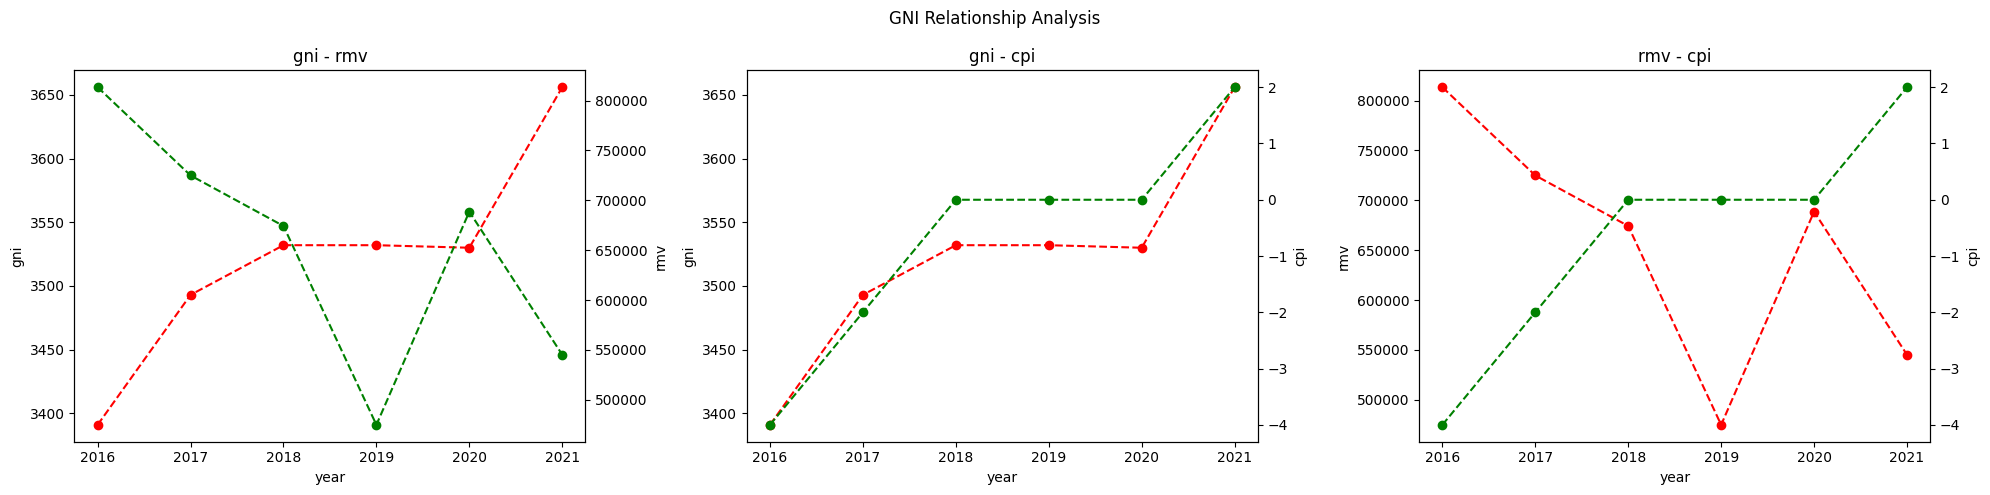

In [1743]:
fig = plt.figure(figsize= (20, 5))    # 피규어 생성
fig.suptitle('GNI Relationship Analysis')


ax1 = fig.add_subplot(1,3,1) # 피규어안에 플롯생성
ax2 = fig.add_subplot(1,3,2) # 피규어안에 플롯생성
ax3 = fig.add_subplot(1,3,3) # 피규어안에 플롯생성
ax1.plot(dataSum.year,dataSum.gni,'ro--') # 플롯 설정1
ax1.set_title('gni - rmv')
ax1.set_xlabel('year')
ax1.set_ylabel('gni')
ax11 = ax1.twinx()  # 플롯에 트위닉스 설정
ax11.plot(dataSum.year,dataSum.rmv,'go--') # 트위닉스된 플롯 설정
ax11.set_ylabel('rmv')


ax2.plot(dataSum.year,dataSum.gni,'ro--') # 플롯 설정2
ax2.set_title('gni - cpi')
ax2.set_xlabel('year')
ax2.set_ylabel('gni')
ax22 = ax2.twinx()  # 플롯에 트위닉스 설정
ax22.plot(dataSum.year,dataSum.cpi,'go--') # 트위닉스된 플롯 설정
ax22.set_ylabel('cpi')

ax3.plot(dataSum.year,dataSum.rmv,'ro--') # 플롯 설정3
ax3.set_title('rmv - cpi')
ax3.set_xlabel('year')
ax3.set_ylabel('rmv')
ax33 = ax3.twinx()  # 플롯에 트위닉스 설정
ax33.plot(dataSum.year,dataSum.cpi,'go--') # 트위닉스된 플롯 설정
ax33.set_ylabel('cpi')

fig.tight_layout()


In [1744]:
cor = dataSum.corr(method='pearson')
cor

,year,cpi,rmv,gni
year,1.000000,0.931589,-0.715282,0.901827
cpi,0.931589,1.000000,-0.784682,0.968474
rmv,-0.715282,-0.784682,1.000000,-0.740273
gni,0.901827,0.968474,-0.740273,1.000000
